In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rc('font', family='Nanum Gothic')

In [2]:
m = pd.read_csv('CSV/조던 1 레트로 하이 OG 시카고 2022 | Jordan | KREAM.csv')
gs = pd.read_csv('CSV/(GS) 조던 1 레트로 하이 OG 시카고 2022 | Jordan | KREAM.csv')
ps = pd.read_csv('CSV/(PS) 조던 1 레트로 하이 OG 시카고 2022 | Jordan | KREAM.csv')
td = pd.read_csv('CSV/(TD) 조던 1 레트로 하이 OG 시카고 2022 | Jordan | KREAM.csv')

In [3]:
def prepare_data(df):
    df['거래일'] = pd.to_datetime(df['거래일'], format='%y/%m/%d')
    df['월별'] = df['거래일'].dt.to_period('M')
    df['거래가'] = df['거래가'].str.replace('원', '').str.replace(',', '').astype(int)
    return df

m = prepare_data(m)
gs = prepare_data(gs)
ps = prepare_data(ps)
td = prepare_data(td)

m.tail()

,Unnamed: 0,거래일,옵션,거래가,빠른배송,월별
21095,21095,2023-04-30,265,420000,False,2023-04
21096,21096,2023-04-30,285,519000,True,2023-04
21097,21097,2023-04-30,280,507000,True,2023-04
21098,21098,2023-04-30,265,437000,True,2023-04
21099,21099,2023-04-30,275,461000,True,2023-04


In [4]:

gs.tail()


,Unnamed: 0,거래일,옵션,거래가,빠른배송,월별
6571,6571,2022-11-18,240(6Y·W),320000,False,2022-11
6572,6572,2022-11-18,225(3.5Y),499000,False,2022-11
6573,6573,2022-11-18,245(6.5Y),340000,False,2022-11
6574,6574,2022-11-18,240(6Y·W),320000,False,2022-11
6575,6575,2022-11-17,245(6.5Y),439000,False,2022-11


In [5]:
ps.tail()


,Unnamed: 0,거래일,옵션,거래가,빠른배송,월별
941,941,2022-11-19,220,161000,False,2022-11
942,942,2022-11-19,210,150000,False,2022-11
943,943,2022-11-19,190,145000,False,2022-11
944,944,2022-11-19,180,149000,False,2022-11
945,945,2022-11-19,170,138000,False,2022-11


In [6]:
td.tail()

,Unnamed: 0,거래일,옵션,거래가,빠른배송,월별
1304,1304,2022-11-19,160,143000,False,2022-11
1305,1305,2022-11-19,130,130000,False,2022-11
1306,1306,2022-11-19,150,219000,False,2022-11
1307,1307,2022-11-19,80,170000,False,2022-11
1308,1308,2022-11-18,120,200000,False,2022-11


In [7]:
def prepare_data_mean(df):
    df = df.groupby('옵션')['거래가'].mean().reset_index()
    df.columns = ['Size', 'Average_Price']
    return df

m_mean = prepare_data_mean(m)
gs_mean = prepare_data_mean(gs)
ps_mean = prepare_data_mean(ps)
td_mean = prepare_data_mean(td)

m_mean

,Size,Average_Price
0,225,336454.545455
1,230,358347.826087
2,235(US 4.5),379452.991453
3,235(US 5),400458.333333
4,240(US 5.5),469133.333333
5,240(US 6),421796.875000
6,245,449043.478261
7,250,370285.472973
8,255,383325.681492
9,260,398253.289474


In [8]:

m_mean['Category'] = 'M'
gs_mean['Category'] = 'GS'
ps_mean['Category'] = 'PS'
td_mean['Category'] = 'TD'
m_mean['발매가'] = 209000
gs_mean['발매가'] = 159000
ps_mean['발매가'] = 109000
td_mean['발매가'] = 99000

combined_mean = pd.concat([td_mean, ps_mean, gs_mean, m_mean])
combined_mean['Size'] = combined_mean['Size'].astype(str)
combined_mean['Average_Price'] = combined_mean['Average_Price'].astype(int)
combined_mean['수익률'] = combined_mean['Average_Price'] / combined_mean['발매가'] * 100 - 100

combined_mean

,Size,Average_Price,Category,발매가,수익률
0,80,130406,TD,99000,31.723232
1,90,111820,TD,99000,12.949495
2,100,105823,TD,99000,6.891919
3,110,109925,TD,99000,11.035354
4,120,128939,TD,99000,30.241414
5,130,138893,TD,99000,40.295960
6,140,139808,TD,99000,41.220202
7,150,139652,TD,99000,41.062626
8,160,139580,TD,99000,40.989899
0,165,160400,PS,109000,47.155963


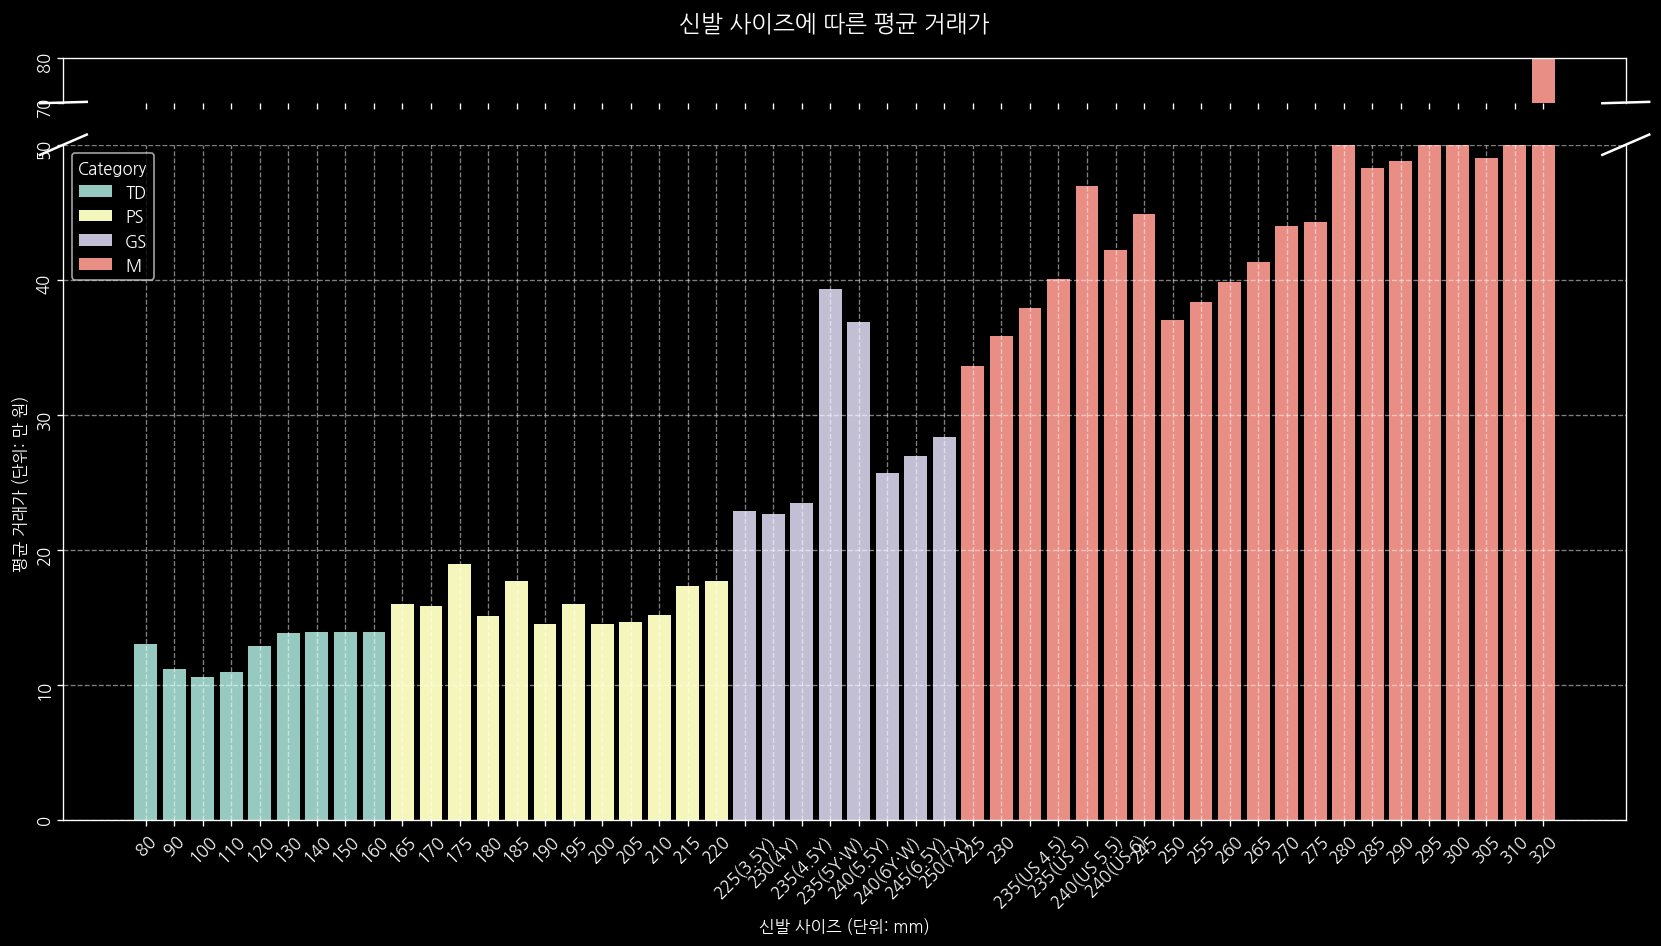

In [9]:
plt.style.use('dark_background')
# Create two subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 8), dpi=120, gridspec_kw={'height_ratios': [1, 15]})

# Set the data
sns.barplot(data=combined_mean, x='Size', y=combined_mean['Average_Price'] / 1e4, hue='Category', ax=ax1)
sns.barplot(data=combined_mean, x='Size', y=combined_mean['Average_Price'] / 1e4, hue='Category', ax=ax2)

# Set the limits for the y-axes (e.g., skipping a portion of the y-axis)
ax1.set_ylim(70, 80)  # Upper range
ax2.set_ylim(0, 50)       # Lower range

# Remove the spines between the axes to simulate a break
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Add diagonal lines to show the skipped portion
d = 0.015  # Size of diagonal lines
kwargs = dict(transform=ax1.transAxes, color='white', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # Top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top-right diagonal

ax1.legend_.remove()
kwargs.update(transform=ax2.transAxes)  # Switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Bottom-right diagonal
plt.suptitle('신발 사이즈에 따른 평균 거래가', y=0.98, fontsize=14)
plt.subplots_adjust(left=-0.1, right=1.1, top=0.95, bottom=0.1)
plt.xlabel('신발 사이즈 (단위: mm)')
ax1.set_ylabel('')
ax2.set_ylabel('평균 거래가 (단위: 만 원)')
plt.xticks(rotation=45)
ax1.tick_params(axis='y', labelrotation=90)
ax2.tick_params(axis='y', labelrotation=90)
plt.grid(True, which='both', axis='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

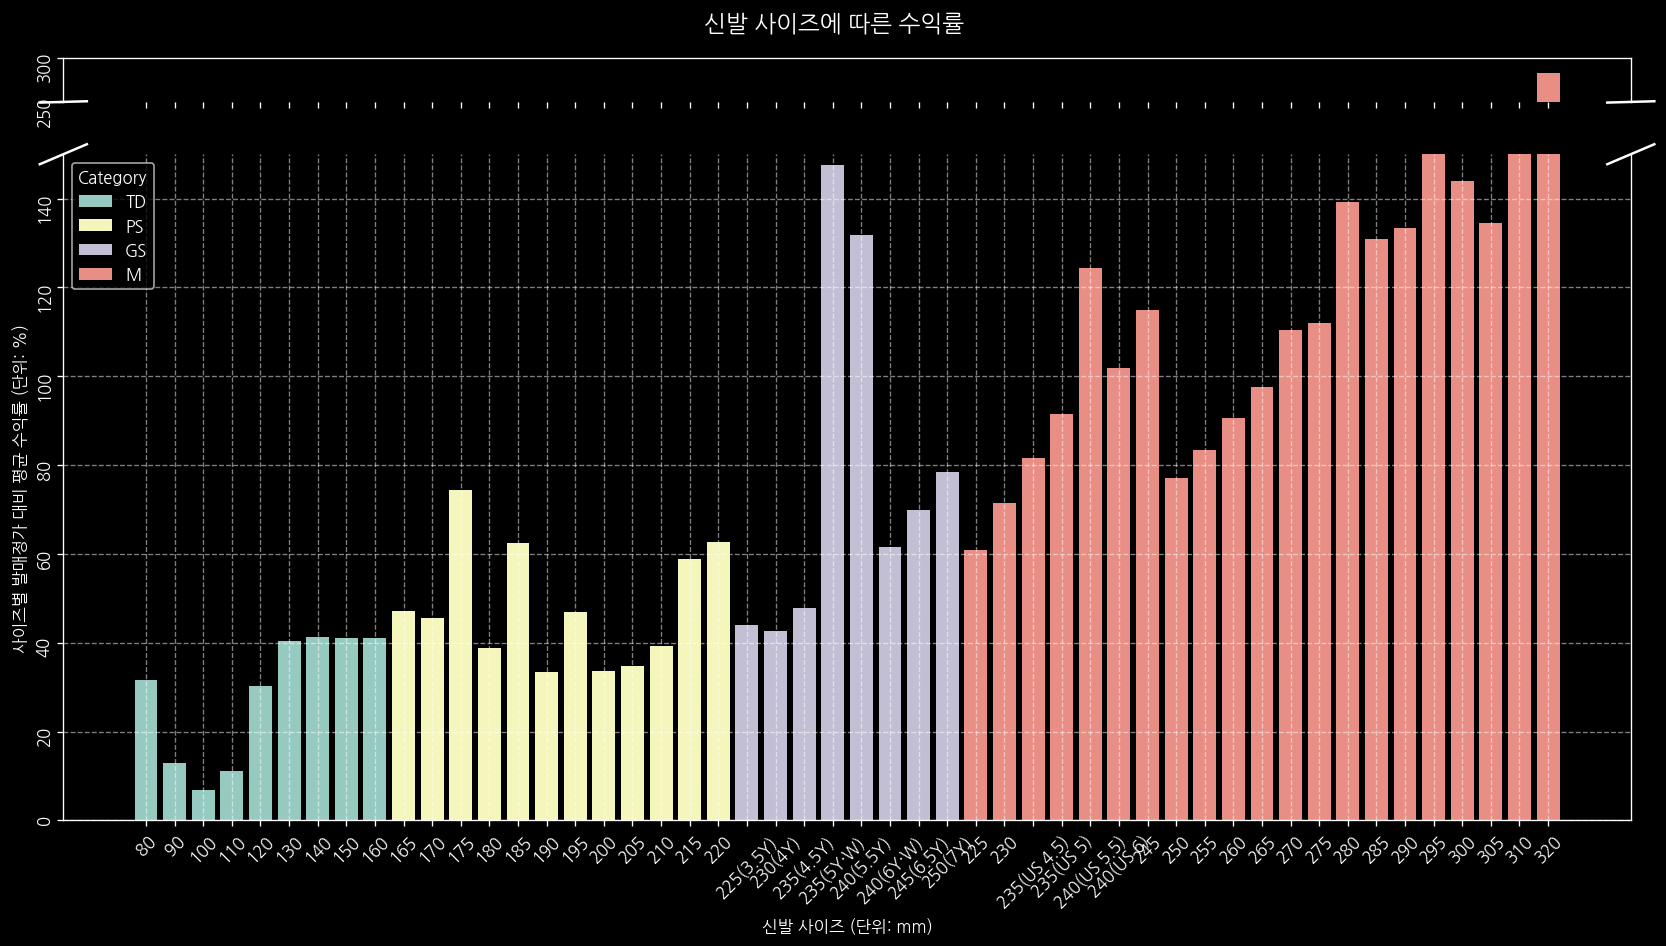

In [10]:
plt.style.use('dark_background')
# Create two subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 8), dpi=120, gridspec_kw={'height_ratios': [1, 15]})

# Set the data
sns.barplot(data=combined_mean, x='Size', y='수익률', hue='Category', ax=ax1)
sns.barplot(data=combined_mean, x='Size', y='수익률', hue='Category', ax=ax2)

# Set the limits for the y-axes (e.g., skipping a portion of the y-axis)
ax1.set_ylim(250, 300)  # Upper range
ax2.set_ylim(0, 150)       # Lower range

# Remove the spines between the axes to simulate a break
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Add diagonal lines to show the skipped portion
d = 0.015  # Size of diagonal lines
kwargs = dict(transform=ax1.transAxes, color='white', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # Top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top-right diagonal

ax1.legend_.remove()
kwargs.update(transform=ax2.transAxes)  # Switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Bottom-right diagonal
plt.suptitle('신발 사이즈에 따른 수익률', y=0.98, fontsize=14)
plt.subplots_adjust(left=0, right=1, top=0.95, bottom=0.1)
plt.xlabel('신발 사이즈 (단위: mm)')
ax1.set_ylabel('')
ax2.set_ylabel('사이즈별 발매정가 대비 평균 수익률 (단위: %)')
plt.xticks(rotation=45)
ax1.tick_params(axis='y', labelrotation=90)
ax2.tick_params(axis='y', labelrotation=90)
plt.grid(True, which='both', axis='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()